## Q1

In [38]:
a = [4 8 12 16 20];
b = [2 4 2 4 2];

In [41]:
a - b
a * 7
a(1) + b(end)
a/2
a./b


ans =

     2     4    10    12    18


ans =

    28    56    84   112   140


ans =

     6


ans =

     2     4     6     8    10


ans =

     2     2     6     4    10



## Q2

In [43]:
c = 2.9979e8;
dist = 1e6;
n_air = 1.000293;
v_air = c/n_air;
time = dist/v_air


time =

    0.0033



## Q3

In [45]:
c = 2.9979e8;
dist = 1e6;
n = [1.00045 1.3330 1.3600 1.4394 1.52 2.42];
v = c./n;
t = dist./v


t =

    0.0033    0.0044    0.0045    0.0048    0.0051    0.0081



## Q4

In [50]:
a = 45:55
sum(a)
b = 15:-2:-15
c = abs(b)
d = 1:0.1:2


a =

    45    46    47    48    49    50    51    52    53    54    55


ans =

   550


b =

  Columns 1 through 13

    15    13    11     9     7     5     3     1    -1    -3    -5    -7    -9

  Columns 14 through 16

   -11   -13   -15


c =

  Columns 1 through 13

    15    13    11     9     7     5     3     1     1     3     5     7     9

  Columns 14 through 16

    11    13    15


d =

  Columns 1 through 7

    1.0000    1.1000    1.2000    1.3000    1.4000    1.5000    1.6000

  Columns 8 through 11

    1.7000    1.8000    1.9000    2.0000



## Q5

In [66]:
%plot inline

In [93]:
R = 8.31;
T = 300;
V = 0.1:0.01:1;
n = 1;
p = n*R*T ./V;

plot(V,p)
xlabel('Volume ($m^3$)', 'Interpreter','latex')
ylabel('Pressure (Pa)')

## Q6

In [167]:
%plot native

In [168]:
a = 1.427e-4;
b = 3.913e-4;

p1 = (n*R*T ./ (V - n*b)) + n^2*a ./ V.^2;
plot(V,p, 'DisplayName','Ideal Gas')
hold on
plot(V,p1, '--r','DisplayName','Real Gas')
hold off
xlabel('Volume ($m^3$)', 'Interpreter','latex')
ylabel('Pressure (Pa)')
legend()

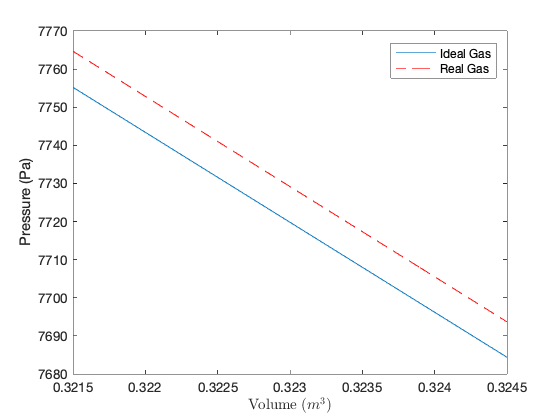

In [98]:
p1 = (n*R*T ./ (V - n*b)) + n^2*a ./ V.^2;
plot(V,p, 'DisplayName','Ideal Gas')
hold on
plot(V,p1, '--r','DisplayName','Real Gas')
hold off
xlabel('Volume ($m^3$)', 'Interpreter','latex')
ylabel('Pressure (Pa)')
xlim([0.3215, 0.3245])
legend()

## Q7

In [140]:
%%file Pv.m

function P = Pv(v, T)
    R = 8.31;
    M = 28e-3;
    P = 4*pi*(M/(2*pi*R*T))^1.5 * v.^2 .* exp(-M*v.^2/(2*R*T));
end

Created file '/Users/rzhu/Documents/teaching/computatinal/Lab1/Pv.m'.


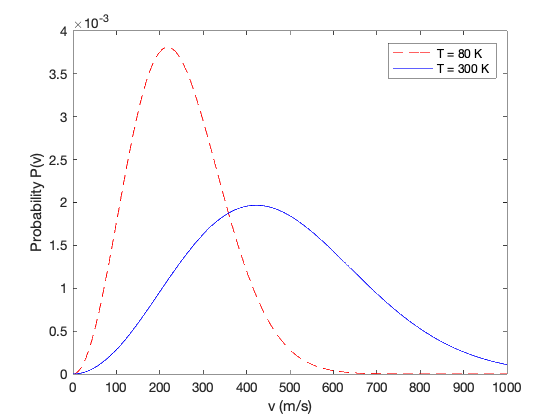

In [143]:
v = 0:1000;

P1 = Pv(v, 80);
P2 = Pv(v, 300);
plot(v, P1, '--r', 'DisplayName', 'T = 80 K')
hold on
plot(v, P2, 'b', 'DisplayName', 'T = 300 K')
hold off
legend()
xlabel('v (m/s)')
ylabel('Probability P(v)')

In [159]:
%%file BnuT.m

function Bnu = BnuT(nu, T)
    h = 6.62606957e-34;
    kB = 1.3806488e-23;
    c = 2.9979e8;
    Bnu = 2*h*nu.^3/c^2 * 1./(exp(h*nu /(kB*T))-1);
end

Created file '/Users/rzhu/Documents/teaching/computatinal/Lab1/BnuT.m'.


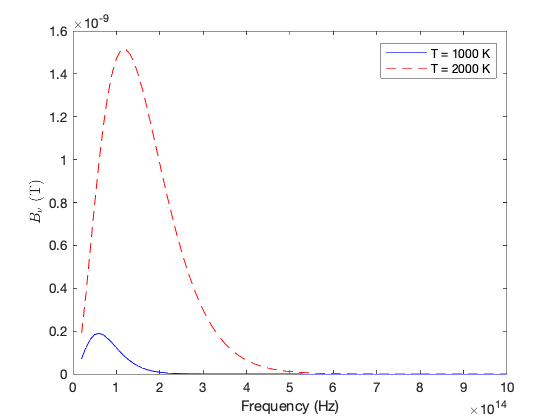

In [160]:
nu = 2e13:1e13:3e15;

Bnu1 = BnuT(nu, 1000);
Bnu2 = BnuT(nu, 2000);
plot(nu, Bnu1, 'b', 'DisplayName', 'T = 1000 K')
hold on 
plot(nu, Bnu2, '--r', 'DisplayName', 'T = 2000 K')
hold off
legend()
xlabel('Frequency (Hz)')
ylabel('$B_{\nu}$ (T)', 'Interpreter', 'latex')
xlim([0 1e15])

## Q9 & Q10

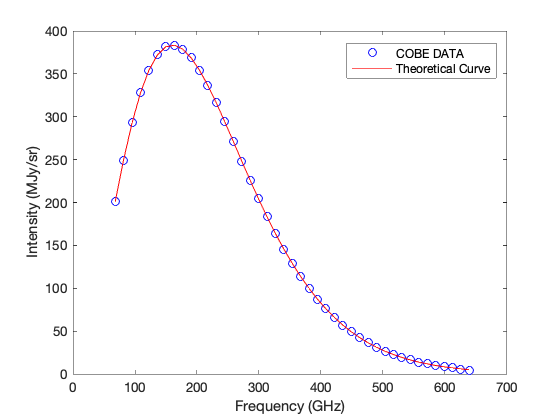

In [165]:
data = dlmread('blackbody.txt');
frequency = data(:,1);
intensity = data(:,2);
plot(frequency, intensity, 'bo', 'DisplayName', 'COBE DATA');
hold on

freq_hz = frequency *1e9;
BnuT_plot = BnuT(freq_hz, 2.725);
BnuT_MJy = BnuT_plot / (1e-26 * 1e6);
plot(frequency, BnuT_MJy, 'r', 'DisplayName', 'Theoretical Curve')
hold off

legend()
xlabel('Frequency (GHz)');
ylabel('Intensity (MJy/sr)');